In [3]:
import os
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt

In [4]:
print(f"Is CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch Version: {torch.__version__}")

Is CUDA available: True
PyTorch Version: 1.10.0+cu113


In [5]:
dataset_path = os.path.abspath("dataset")

transforms = tt.Compose([tt.Resize((512, 512)),
                        tt.ToTensor()])

train_dataset = ImageFolder(os.path.join(dataset_path, "Train"), transforms)
test_dataset = ImageFolder(os.path.join(dataset_path, "Test"), transforms)
validation_dataset = ImageFolder(os.path.join(dataset_path, "Validation"), transforms)

In [6]:
batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=4)

In [14]:
label_map = {0: "mask", 1: "no_mask"}

def show_batch(dataloader):
    for images, labels in dataloader:
        fig, axs = plt.subplots(4, int(len(labels)/4), constrained_layout=True, dpi=300)

        for (image, label, axs) in zip(images, labels, axs.flatten()):
            axs.imshow(image.permute(1,2,0))
            axs.set_title(label_map[label.item()])
            axs.axis('off')
        
        break

    plt.show()

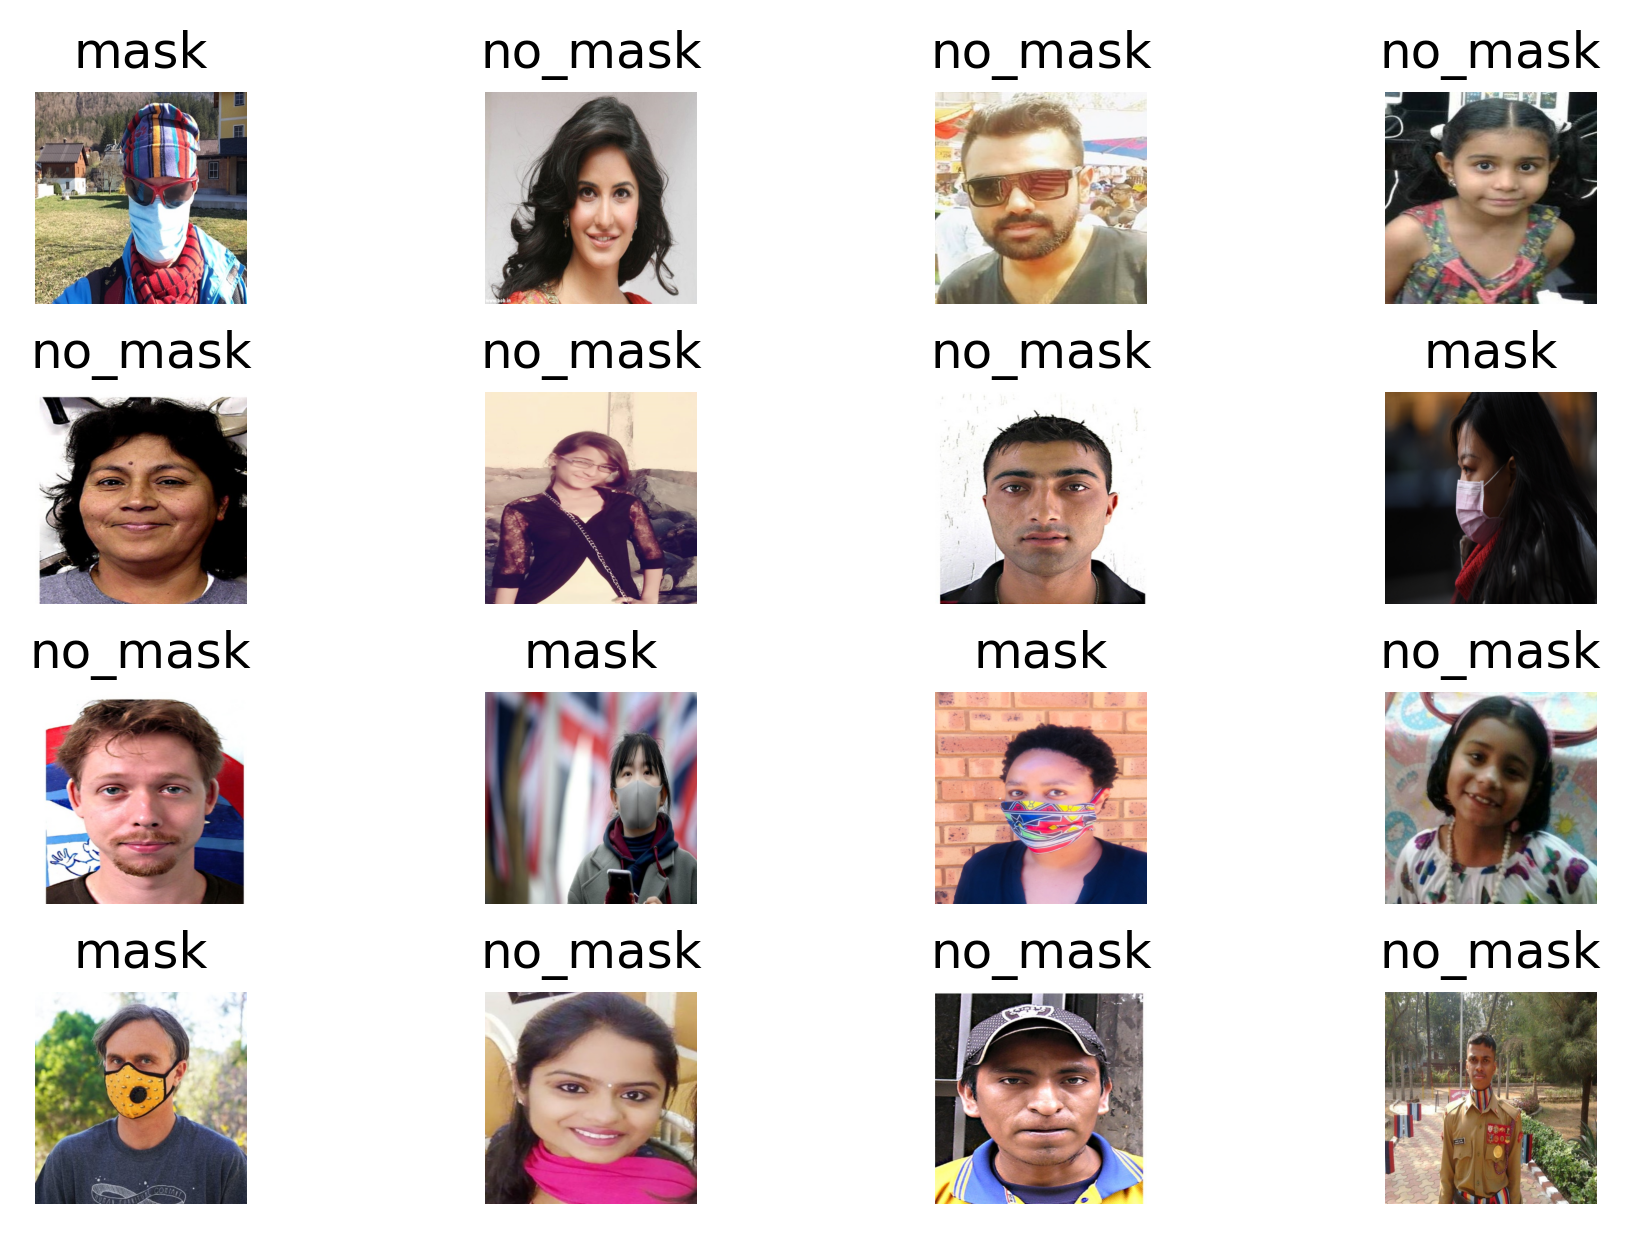

In [15]:
show_batch(train_dataloader)